# Modelo para Precificação de Salários para Profissionais de Dados

O **objetivo** deste projeto e fazer predições precisas sobre o salario a ser pago a um profissional da area de dados com base nos salarios conhecidos para que a empresa possa oferecer remuneração competitiva a funcionarios existentes e futuros.

---

## Analise exploratoria 
Como base de dados iremos utilizar a pesquisa feita pelo pessoal do Data Hackers em 2021 a nivel nacional, entrevistando 2645 profissionais que responderam sobre diversas variáveis de suas carreirais, desde salário e tempo de experiência até plataformas de ensino e conceitos mais utilizados.




In [155]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 400) #aumentando o limite de colunas a ser exbida
link = 'https://raw.githubusercontent.com/DionesGouvea/Salary-Prediction/main/Datasets/State%20of%20Data%202021%20-%20Dataset%20-%20Pgina1.csv'
dados = pd.read_csv(link)
dados

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_b ', 'Salário atual não corresponde ao mercado')","('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_e ', 'Gostaria de receber mais benefícios')","('P2_l_f ', 'O clima de trabalho/ambiente não é bom')","('P2_l_g ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_a ', 'Remuneração/Salário')","('P2_o_b ', 'Benefícios')","('P2_o_c ', 'Propósito do trabalho e da empresa')","('P2_o_d ', 'Flexibilidade de trabalho remoto')","('P2_o_e ', 'Ambiente e clima de trabalho')","('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_a ', 'Analytics Engineer')","('P3_b_b ', 'Engenharia de Dados/Data Engineer')","('P3_b_c ', 'Analista de Dados/Data Analyst')","('P3_b_d ', 'Cientista de Dados/Data Scientist')","('P3_b_e ', 'Database Administrator/DBA')","('P3_b_f ', 'Analista de Business Intelligence/BI')","('P3_b_g ', 'Arquiteto de Dados/Data Architect')","('P3_b_h ', 'Data Product Manager/DPM')","('P3_b_i ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_a ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_b ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_c ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_d ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_e ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_f ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')","('P3_c_g ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')","('P3_c_h ', 'Apesar de ser gestor ainda atuo na part

In [156]:
# Pegando os nomes das colunas para visualizar as mais relevantes
#column_headers = list(dados.columns)
#print("colunas :", column_headers)

### Analise Exploratoria Univariada 

In [157]:
#verificando o estado dos entrevistados 
dados["('P1_e ', 'Estado onde mora')"].value_counts()

São Paulo (SP)              1076
Minas Gerais (MG)            341
Rio de Janeiro (RJ)          222
Paraná (PR)                  149
Rio Grande do Sul (RS)       136
Santa Catarina (SC)          115
Distrito Federal (DF)         96
Ceará (CE)                    68
Pernambuco (PE)               58
Bahia (BA)                    58
Goiás (GO)                    57
Fora do Brasil                53
Paraíba (PB)                  39
Espírito Santo (ES)           32
Rio Grande do Norte (RN)      22
Sergipe (SE)                  20
Mato Grosso (MT)              19
Alagoas (AL)                  14
Piauí (PI)                    13
Mato Grosso do Sul (MS)       12
Maranhão (MA)                  9
Name: ('P1_e ', 'Estado onde mora'), dtype: int64

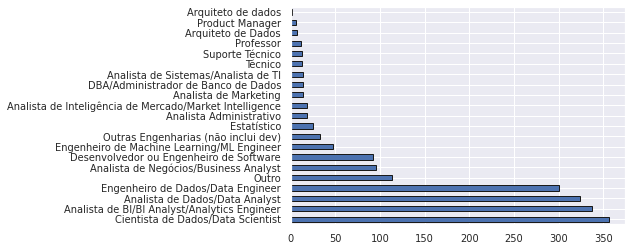

In [158]:
#Vendo a distribuição dos cargos 
dados["('P2_f ', 'Cargo Atual')"].value_counts().plot(kind = 'barh',edgecolor = 'k')

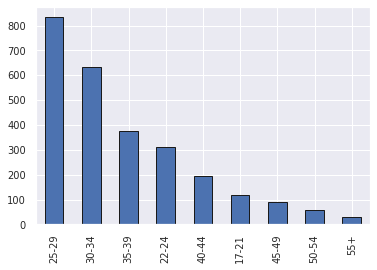

In [159]:
#verificando a faixa de idade 
dados["('P1_a_a ', 'Faixa idade')"].value_counts().plot(kind = 'bar',edgecolor = 'k')

In [160]:
#verificando o percentual de nivel de ensino dos entrevistados
n = dados.shape[0]
(dados["('P1_h ', 'Nivel de Ensino')"].value_counts()/n).round(2)

Graduação/Bacharelado         0.34
Pós-graduação                 0.31
Estudante de Graduação        0.15
Mestrado                      0.13
Doutorado ou Phd              0.04
Não tenho graduação formal    0.02
Prefiro não informar          0.00
Name: ('P1_h ', 'Nivel de Ensino'), dtype: float64

In [161]:
#vendo a distribuição da faixa salarial 
dados["('P2_h ', 'Faixa salarial')"].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     479
de R$ 4.001/mês a R$ 6.000/mês      403
de R$ 6.001/mês a R$ 8.000/mês      393
de R$ 12.001/mês a R$ 16.000/mês    263
de R$ 3.001/mês a R$ 4.000/mês      183
de R$ 2.001/mês a R$ 3000/mês       180
de R$ 16.001/mês a R$ 20.000/mês    129
de R$ 1.001/mês a R$ 2.000/mês      126
de R$ 20.001/mês a R$ 25.000/mês     62
de R$ 25.001/mês a R$ 30.000/mês     43
de R$ 30.001/mês a R$ 40.000/mês     38
Acima de R$ 40.001/mês               34
Menos de R$ 1.000/mês                32
Name: ('P2_h ', 'Faixa salarial'), dtype: int64

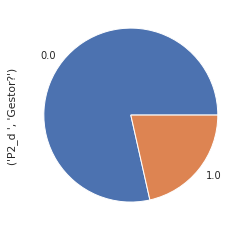

In [162]:
#verificando cargos de gestor 
dados["('P2_d ', 'Gestor?')"].value_counts().plot(kind = 'pie')


In [163]:
#verificando o percentual das linguagens mais utilizadas pelos entrevistados
n = dados.shape[0]
(dados["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts()/n).round(2)

Python                                         0.28
SQL                                            0.28
Não utilizo nenhuma das linguagens listadas    0.06
R                                              0.03
Visual Basic/VBA                               0.02
JavaScript                                     0.01
Scala                                          0.01
SAS/Stata                                      0.01
C/C++/C#                                       0.00
Java                                           0.00
PHP                                            0.00
.NET                                           0.00
Matlab                                         0.00
Name: ('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?'), dtype: float64

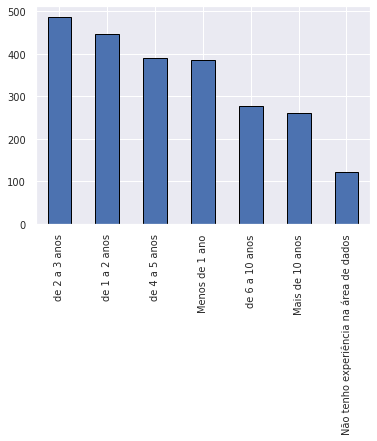

In [164]:
#verificando o tempo de experiencia 
dados["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].value_counts().plot(kind ='bar', edgecolor = 'black')

In [165]:
#vendo a distribuição em setores 
dados["('P2_b ', 'Setor')"].value_counts()

Tecnologia/Fábrica de Software    641
Finanças ou Bancos                388
Varejo                            141
Indústria                         133
Educação                          129
Área da Saúde                     128
Outro                             122
Internet/Ecommerce                108
Setor Público                     101
Marketing                          80
Telecomunicação                    68
Agronegócios                       48
Consultoria                        47
Setor Alimentício                  46
Setor Automotivo                   33
Entretenimento ou Esportes         28
Seguros ou Previdência             27
Energia                            24
Imobiliário                        23
Construção Civil                   18
Serviços                           17
Logística                          10
consultoria                         5
Name: ('P2_b ', 'Setor'), dtype: int64

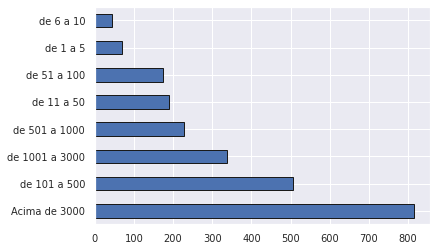

In [166]:
#verificando o numero de funcionarios das empresas dos entrevistados 
dados["('P2_c ', 'Numero de Funcionarios')"].value_counts().plot(kind = 'barh',edgecolor = 'k')

In [167]:
#pegando a porcentagem de cada modalidade de trabalho  
n=dados["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"].shape[0]
(dados["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"].value_counts()/n).round(2)

Modelo 100% remoto                                                                                                0.50
Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)    0.17
Modelo 100% presencial                                                                                            0.12
Modelo híbrido com dias fixos de trabalho presencial                                                              0.09
Name: ('P2_q ', 'Atualmente qual a sua forma de trabalho?'), dtype: float64

In [168]:
# Pre processamento basico 
#criando variaveis mais convenientes 

#salario 
salamap = {    'Menos de R$ 1.000/mês': 1000,
      'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
       'de R$ 2.001/mês a R$ 3000/mês': 2500,
      'de R$ 3.001/mês a R$ 4.000/mês': 3500,
      'de R$ 4.001/mês a R$ 6.000/mês': 5000, 
      'de R$ 6.001/mês a R$ 8.000/mês': 7000,
     'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500,
    'de R$ 25.001/mês a R$ 30.000/mês': 27500,
    'de R$ 30.001/mês a R$ 40.000/mês': 35000,
              'Acima de R$ 40.001/mês': 40000}
#empresa
tammap = { 'de 1 a 5': 'Pequena',
           'de 6 a 10': 'Pequena',
           'de 11 a 50': 'Pequena',
           'de 51 a 100': 'Pequena',
           'de 101 a 500': 'Média',
           'de 501 a 1000': 'Média',
           'de 1001 a 3000': 'Grande',
           'Acima de 3000': 'Grande'}

dados0 = pd.DataFrame()

dados0['Salário'] = dados["('P2_h ', 'Faixa salarial')"].map(salamap) 
dados0['Genero'] = dados["('P1_b ', 'Genero')"]
dados0['Profissão'] = dados["('P2_f ', 'Cargo Atual')"]
dados0['Experiencia'] = dados["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"]
dados0['Cargo de Gestão'] = dados["('P2_d ', 'Gestor?')"].map({0: 'não', 1: 'sim'})
dados0['Escolaridade'] = dados["('P1_h ', 'Nivel de Ensino')"]
dados0['Tamanho da Empresa'] = dados["('P2_c ', 'Numero de Funcionarios')"].map(tammap)
dados0['Estado'] = dados["('P1_e ', 'Estado onde mora')"]
dados0['setor'] = dados["('P2_b ', 'Setor')"]
dados0['Linguagem Python'] = dados["('P4_e_c ', 'Python')"]
dados0['Linguagem R'] = dados["('P4_e_b ', 'R ')"]
dados0['Linguagem SQL'] = dados["('P4_e_a ', 'SQL')"]





In [169]:
#descobrindo a media de salario dos entrevistados
round(dados0['Salário'].mean(), 2)

9361.1

In [170]:
#vendo a distribuição dos dados por genero
dados0['Genero'].value_counts()

Masculino    2144
Feminino      493
Outro           8
Name: Genero, dtype: int64

### Analise Exploratoria Bivariada

In [171]:
#usando unstack() para retornar um DF e usando .T para inverter as colunas com o indice
dados0.groupby(['Genero', 'Tamanho da Empresa']).count()['Salário'].unstack().T

Genero,Feminino,Masculino,Outro
Tamanho da Empresa,,,
Grande,217,933,2
Média,135,598,1
Pequena,84,393,2


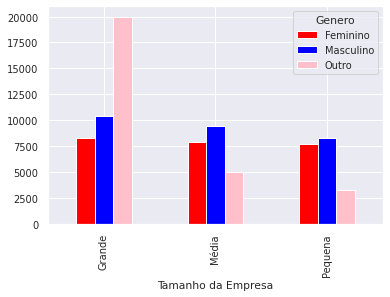

In [172]:
#visualizando a media de salario por genero e tamanho da empresa 
dados0.groupby(['Genero', 'Tamanho da Empresa']).mean()['Salário'].unstack().T.plot(kind = 'bar', color = ['red', 'blue', 'pink'])
                                                                              

In [173]:
#verificando a media de salario por profissão 
dados0.groupby('Profissão').agg(['count','mean'])['Salário'].round(2).sort_values(by = 'mean',ascending = False)

,count,mean
Profissão,,
Arquiteto de Dados,7,21285.71
Product Manager,6,12750.00
Arquiteto de dados,2,12000.00
Engenheiro de Dados/Data Engineer,300,10120.00
Engenheiro de Machine Learning/ML Engineer,48,10041.67
Estatístico,25,9780.00
Cientista de Dados/Data Scientist,357,9067.23
Desenvolvedor ou Engenheiro de Software,92,8336.96
Analista de Negócios/Business Analyst,96,7067.71


In [174]:
#verificando a diferença de salario conforme experiencia profissional
dados0.groupby(['Profissão', 'Experiencia']).mean()['Salário'].round(2).unstack()

Experiencia,Mais de 10 anos,Menos de 1 ano,Não tenho experiência na área de dados,de 1 a 2 anos,de 2 a 3 anos,de 4 a 5 anos,de 6 a 10 anos
Profissão,,,,,,,
Analista Administrativo,2500.00,1833.33,2916.67,2875.00,NaN,2500.00,5333.33
Analista de BI/BI Analyst/Analytics Engineer,12386.36,3333.33,1500.00,4367.09,6581.40,8327.27,8562.50
Analista de Dados/Data Analyst,10236.84,3974.03,5500.00,5840.58,7500.00,8638.30,8878.38
Analista de Inteligência de Mercado/Market Intelligence,14500.00,2928.57,NaN,3500.00,7333.33,10000.00,10000.00
Analista de Marketing,NaN,2000.00,5000.00,4000.00,4166.67,5000.00,10000.00
Analista de Negócios/Business Analyst,13227.27,4842.11,8200.00,4500.00,8733.33,7090.91,8687.50
Analista de Sistemas/Analista de TI,NaN,2500.00,4250.00,4500.00,10000.00,NaN,10000.00
Arquiteto de Dados,16000.00,NaN,NaN,10000.00,18000.00,NaN,29666.67
Arquiteto de dados,NaN,NaN,NaN,NaN,14000.00,NaN,10000.00


In [175]:
#criando uma matriz para visualizar algumas variaveis de uma unica vez
listaquest = [['Linguagem Python','Genero'],  
              ['Cargo de Gestão','Linguagem SQL'],
              ['Tamanho da Empresa','Linguagem R']]       

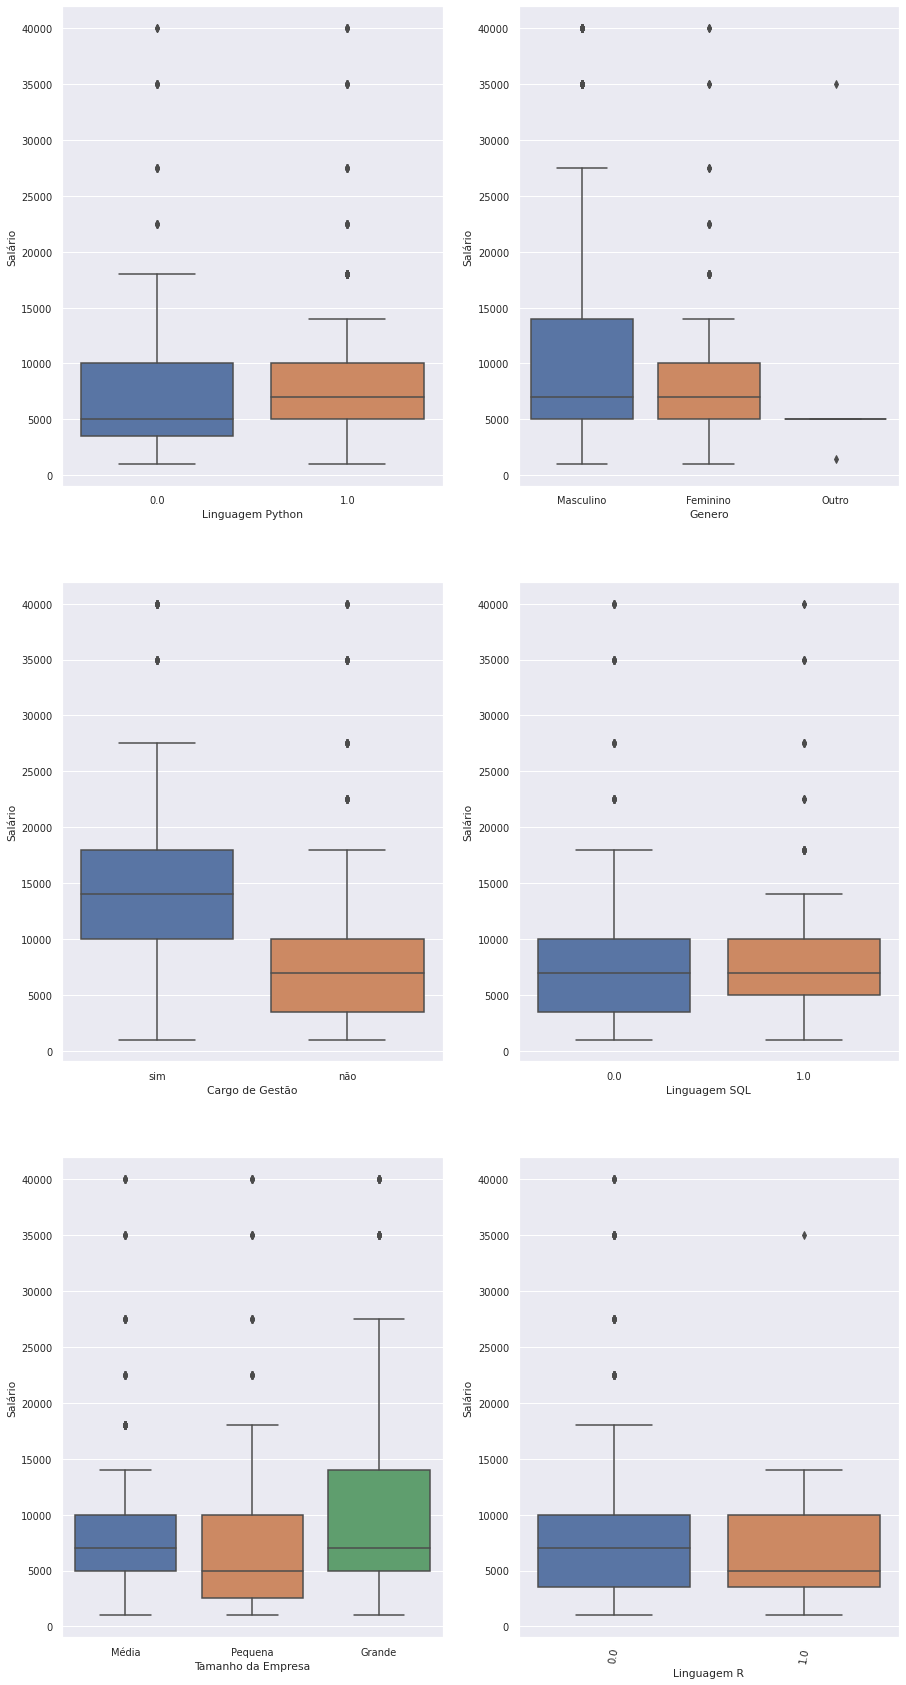

In [176]:
sns.set(font_scale=0.9)
fig, eixo = plt.subplots(3,2,figsize=(15,30)) # Criando uma figura de 3 linhas x 2 colunas para nossa matriz
# Para cada linha 
for linha in range(3):
    # Para cada coluna   
    for coluna in range(2): 
      plt.xticks(rotation = 80)
      sns.boxplot(data=dados0,x=listaquest[linha][coluna],y='Salário',ax=eixo[linha][coluna])
      

Text(0.5, 1.0, 'Salario por Estado')

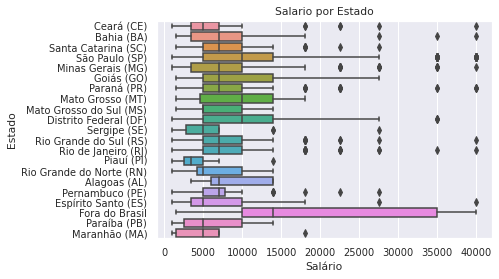

In [177]:
#visualizando a correlação da variavel estado com salario 
sns.boxplot(
    data = dados0,
    x='Salário',
    y='Estado'
)
plt.title('Salario por Estado')

Text(0.5, 1.0, 'Salário por nivel de Escolaridade')

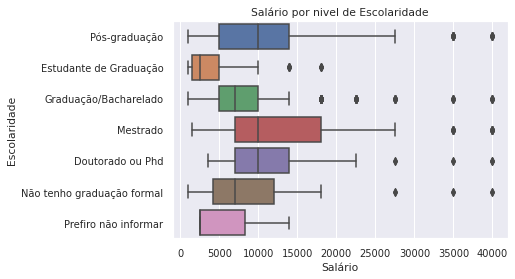

In [178]:
#visualizando a correlação da variavel Escolaridade com Salario
sns.boxplot(
    data = dados0,
    x='Salário',
    y='Escolaridade' 
)
plt.title('Salário por nivel de Escolaridade')

Text(0.5, 0, 'Salario')

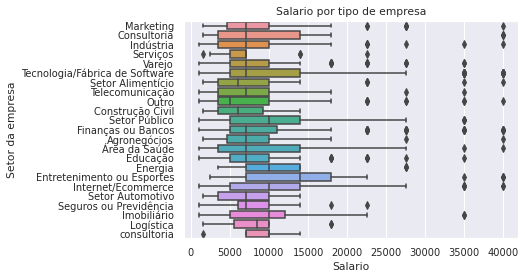

In [179]:
#visualizando a correlação da variavel setor com Salario
sns.boxplot(
    data = dados0,
    x='Salário',
    y='setor' 
)
plt.title('Salario por tipo de empresa')
plt.ylabel('Setor da empresa')
plt.xlabel('Salario')

# Pre processamento 

xx xx xx xx x xxx

In [180]:
dados0.isnull().mean()

Salário               0.105860
Genero                0.000000
Profissão             0.297921
Experiencia           0.105860
Cargo de Gestão       0.105860
Escolaridade          0.000000
Tamanho da Empresa    0.105860
Estado                0.013611
setor                 0.105860
Linguagem Python      0.297921
Linguagem R           0.297921
Linguagem SQL         0.297921
dtype: float64

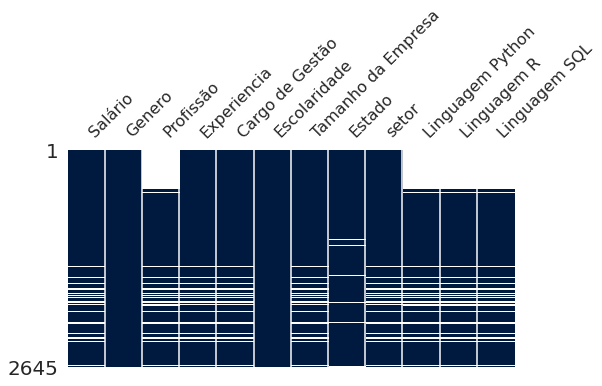

In [181]:
import missingno as msno
msno.matrix(dados0, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False)

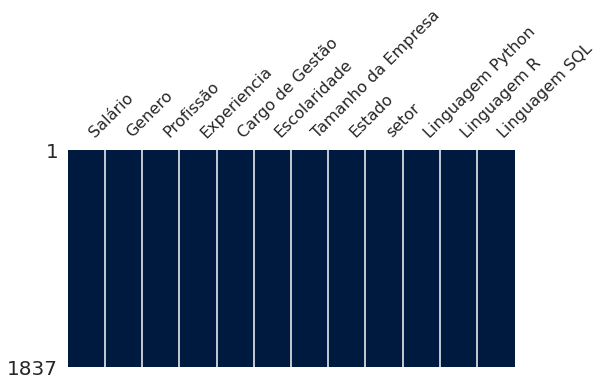

In [182]:
dados0 = dados0.dropna()
msno.matrix(dados0, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False)

In [183]:
dados0

,Salário,Genero,Profissão,Experiencia,Cargo de Gestão,Escolaridade,Tamanho da Empresa,Estado,setor,Linguagem Python,Linguagem R,Linguagem SQL
482,7000.0,Masculino,Engenheiro de Dados/Data Engineer,Menos de 1 ano,não,Graduação/Bacharelado,Média,Paraná (PR),Tecnologia/Fábrica de Software,1.0,0.0,0.0
483,7000.0,Feminino,Cientista de Dados/Data Scientist,de 6 a 10 anos,não,Pós-graduação,Média,Rio Grande do Sul (RS),Finanças ou Bancos,0.0,0.0,1.0
484,5000.0,Feminino,Técnico,Menos de 1 ano,não,Mestrado,Grande,Paraná (PR),Setor Público,0.0,0.0,0.0
485,5000.0,Feminino,Analista de BI/BI Analyst/Analytics Engineer,de 1 a 2 anos,não,Pós-graduação,Grande,Minas Gerais (MG),Educação,0.0,0.0,1.0
486,7000.0,Masculino,Engenheiro de Dados/Data Engineer,de 4 a 5 anos,não,Graduação/Bacharelado,Pequena,Rio Grande do Sul (RS),Marketing,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2636,7000.0,Masculino,Engenheiro de Dados/Data Engineer,de 1 a 2 anos,não,Não tenho graduação formal,Pequena,Paraná (PR),Tecnologia/Fábrica de Software,1.0,0.0,0.0
2637,27500.0,Masculino,Outras Engenharias (não inclui dev),Menos de 1 ano,não,Mestrado,Grande,Rio de Janeiro (RJ),Energia,1.0,0.0,0.0
2639,5000.0,Masculino,Analista de BI/BI Analyst/Analytics Engineer,de 1 a 2 anos,não,Pós-graduação,Média,Santa Catarina (SC),Área da Saúde,1.0,0.0,0.0
2641,7000.0,Masculino,Cientista de Dados/Data Scientist,de 4 a 5 anos,não,Graduação/Bacharelado,Média,Santa Catarina (SC),Tecnologia/Fábrica de Software,1.0,0.0,0.0


In [184]:
df_onehot = pd.get_dummies(dados0,drop_first=True)
df_onehot

,Salário,Linguagem Python,Linguagem R,Linguagem SQL,Genero_Masculino,Genero_Outro,Profissão_Analista de BI/BI Analyst/Analytics Engineer,Profissão_Analista de Dados/Data Analyst,Profissão_Analista de Inteligência de Mercado/Market Intelligence,Profissão_Analista de Marketing,Profissão_Analista de Negócios/Business Analyst,Profissão_Analista de Sistemas/Analista de TI,Profissão_Arquiteto de Dados,Profissão_Arquiteto de dados,Profissão_Cientista de Dados/Data Scientist,Profissão_DBA/Administrador de Banco de Dados,Profissão_Desenvolvedor ou Engenheiro de Software,Profissão_Engenheiro de Dados/Data Engineer,Profissão_Engenheiro de Machine Learning/ML Engineer,Profissão_Estatístico,Profissão_Outras Engenharias (não inclui dev),Profissão_Outro,Profissão_Product Manager,Profissão_Professor,Profissão_Suporte Técnico,Profissão_Técnico,Experiencia_Menos de 1 ano,Experiencia_Não tenho experiência na área de dados,Experiencia_de 1 a 2 anos,Experiencia_de 2 a 3 anos,Experiencia_de 4 a 5 anos,Experiencia_de 6 a 10 anos,Escolaridade_Estudante de Graduação,Escolaridade_Graduação/Bacharelado,Escolaridade_Mestrado,Escolaridade_Não tenho graduação formal,Escolaridade_Prefiro não informar,Escolaridade_Pós-graduação,Tamanho da Empresa_Média,Tamanho da Empresa_Pequena,Estado_Bahia (BA),Estado_Ceará (CE),Estado_Distrito Federal (DF),Estado_Espírito Santo (ES),Estado_Fora do Brasil,Estado_Goiás (GO),Estado_Maranhão (MA),Estado_Mato Grosso (MT),Estado_Mato Grosso do Sul (MS),Estado_Minas Gerais (MG),Estado_Paraná (PR),Estado_Paraíba (PB),Estado_Pernambuco (PE),Estado_Piauí (PI),Estado_Rio Grande do Norte (RN),Estado_Rio Grande do Sul (RS),Estado_Rio de Janeiro (RJ),Estado_Santa Catarina (SC),Estado_Sergipe (SE),Estado_São Paulo (SP),setor_Construção Civil,setor_Consultoria,setor_Educação,setor_Energia,setor_Entretenimento ou Esportes,setor_Finanças ou Bancos,setor_Imobiliário,setor_Indústria,setor_Internet/Ecommerce,setor_Logística,setor_Marketing,setor_Outro,setor_Seguros ou Previdência,setor_Serviços,setor_Setor Alimentício,setor_Setor Automotivo,setor_Setor Público,setor_Tecnologia/Fábrica de Software,setor_Telecomunicação,setor_Varejo,setor_consultoria,setor_Área da Saúde
482,7000.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
483,7000.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
484,5000.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
485,5000.0,0.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
486,7000.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,7000.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2637,27500.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2639,5000.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2641,7000.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0

In [185]:
X = df_onehot.drop('Salário', axis = 1)
y = df_onehot.Salário
X

,Linguagem Python,Linguagem R,Linguagem SQL,Genero_Masculino,Genero_Outro,Profissão_Analista de BI/BI Analyst/Analytics Engineer,Profissão_Analista de Dados/Data Analyst,Profissão_Analista de Inteligência de Mercado/Market Intelligence,Profissão_Analista de Marketing,Profissão_Analista de Negócios/Business Analyst,Profissão_Analista de Sistemas/Analista de TI,Profissão_Arquiteto de Dados,Profissão_Arquiteto de dados,Profissão_Cientista de Dados/Data Scientist,Profissão_DBA/Administrador de Banco de Dados,Profissão_Desenvolvedor ou Engenheiro de Software,Profissão_Engenheiro de Dados/Data Engineer,Profissão_Engenheiro de Machine Learning/ML Engineer,Profissão_Estatístico,Profissão_Outras Engenharias (não inclui dev),Profissão_Outro,Profissão_Product Manager,Profissão_Professor,Profissão_Suporte Técnico,Profissão_Técnico,Experiencia_Menos de 1 ano,Experiencia_Não tenho experiência na área de dados,Experiencia_de 1 a 2 anos,Experiencia_de 2 a 3 anos,Experiencia_de 4 a 5 anos,Experiencia_de 6 a 10 anos,Escolaridade_Estudante de Graduação,Escolaridade_Graduação/Bacharelado,Escolaridade_Mestrado,Escolaridade_Não tenho graduação formal,Escolaridade_Prefiro não informar,Escolaridade_Pós-graduação,Tamanho da Empresa_Média,Tamanho da Empresa_Pequena,Estado_Bahia (BA),Estado_Ceará (CE),Estado_Distrito Federal (DF),Estado_Espírito Santo (ES),Estado_Fora do Brasil,Estado_Goiás (GO),Estado_Maranhão (MA),Estado_Mato Grosso (MT),Estado_Mato Grosso do Sul (MS),Estado_Minas Gerais (MG),Estado_Paraná (PR),Estado_Paraíba (PB),Estado_Pernambuco (PE),Estado_Piauí (PI),Estado_Rio Grande do Norte (RN),Estado_Rio Grande do Sul (RS),Estado_Rio de Janeiro (RJ),Estado_Santa Catarina (SC),Estado_Sergipe (SE),Estado_São Paulo (SP),setor_Construção Civil,setor_Consultoria,setor_Educação,setor_Energia,setor_Entretenimento ou Esportes,setor_Finanças ou Bancos,setor_Imobiliário,setor_Indústria,setor_Internet/Ecommerce,setor_Logística,setor_Marketing,setor_Outro,setor_Seguros ou Previdência,setor_Serviços,setor_Setor Alimentício,setor_Setor Automotivo,setor_Setor Público,setor_Tecnologia/Fábrica de Software,setor_Telecomunicação,setor_Varejo,setor_consultoria,setor_Área da Saúde
482,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
483,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
484,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
485,0.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
486,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2637,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2639,1.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2641,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [186]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size = 0.30, random_state=666)

In [187]:
X_treino.shape,X_teste.shape

((1285, 81), (552, 81))

In [188]:
from sklearn.linear_model import LinearRegression
#fit_intercept = True para calcular o preço do salario padrão
lr = LinearRegression(fit_intercept=True, normalize =False, n_jobs = -1)# normalize = False pois ja normalizamos os dados  -1~1
lr.fit(X_treino,y_treino) #treinando o modelo

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(n_jobs=-1, normalize=False)

In [189]:
#visualizando a predição 
y_pred = lr.predict(X_teste)
y_pred

array([17758.14033473,  5182.74409883,  8371.35380011,  9718.25284309,
        5992.37750095,  5353.00746278,   202.37314781,  4223.32317904,
        4370.96936659, 10238.65281939, 12485.49992756,  8435.17283778,
        8079.08282323, 13019.08014498,  9538.34453581,  9875.18895606,
       11986.0815322 ,  6542.57717384,  4525.58993335,  5737.81223925,
        2769.5394322 ,  4454.50204151,  5381.65155256,  7602.7047251 ,
        4431.80097006, 10114.89876032,  6756.29201455,  3575.63787369,
        8102.74658604, 13147.03394077,  2921.24930297, 19776.42972406,
        9751.0830832 ,  9079.76076906,  7325.24565647,  4399.21876091,
       10873.51632033,  1832.82194198, 10626.48979567,  6776.35601513,
       21978.72565769,  8276.43188717,  1160.2757644 ,  2718.9090588 ,
        9838.90830284,  7331.25787806, 12789.51496412,  4381.82524293,
        4673.72875513,  4932.73102063,  6004.00516894,  6840.01947125,
       10846.01036233,  8250.07213003,  6771.61481941,  7080.00558722,
      

In [190]:
y_teste

725     14000.0
2008    14000.0
631     10000.0
1720    10000.0
2591     2500.0
         ...   
2611    10000.0
1774     7000.0
766      1500.0
1291     2500.0
1500    14000.0
Name: Salário, Length: 552, dtype: float64

In [191]:
#calculando o erro quadratico 
#raiz quadrada da media do meu erro elevado ao quadrado 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_teste,y_pred))

5008.295975978476

In [192]:
#erro absoluto medio 
(np.abs(y_pred - y_teste)).mean()

3350.143334642406

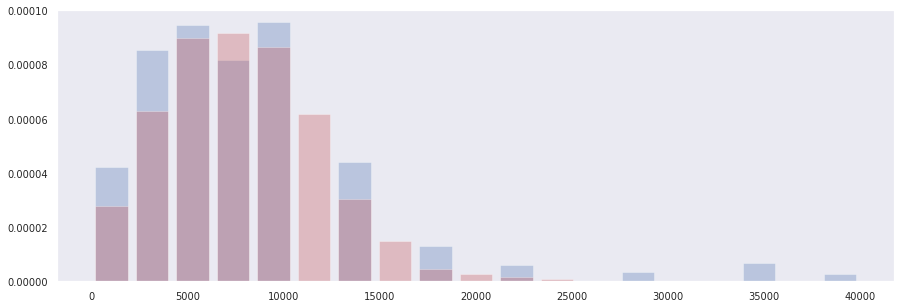

In [193]:
#comparando o nossos valor previsto pelo modelo com o nosso valor original do y_teste
plt.figure(figsize = (15,5))


Max = y_teste.max()
plt.hist(y_teste, bins = np.linspace(0,Max,20), rwidth=.8, alpha = .3,  color = 'b',density = True)
plt.hist(y_pred, bins = np.linspace(0,Max,20), rwidth=.8, alpha = .3, color = 'r',density = True)
plt.grid()